In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data() # MNIST: 필기 숫자 데이터셋
x_train = x_train.reshape(60000, 784) # 1차원 구조로 변환
x_test = x_test.reshape(10000, 784) # 1차원 구조로 변환
x_train = x_train.astype(np.float32)/255.0 # [0,1]로 정규화
x_test = x_test.astype(np.float32)/255.0 # [0,1]로 정규화
y_train = tf.keras.utils.to_categorical(y_train, 10) # 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test, 10) # 원핫 코드로 변환

In [3]:
# 모델 선택(신경망 구조 설계)
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation="tanh", input_shape=(784,))) # 은닉층 노드 개수 512 / 은닉층 활성 함수 tanh / 입력층 모양
mlp_sgd.add(Dense(units=10, activation="softmax")) # 출력층 노드 개수 10 / 출력층 활성 함수 softmax

c:\Users\GreenTea\anaconda3\envs\Test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 학습
mlp_sgd.compile(loss="MSE", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"]) # MSE 손실 함수 / SGD 옵티마이저 / 학습률 / 평가지표:정확도
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) # 훈련 집합 / 미니 배치 크기 / 훈련횟수 / 검증 집합

# 예측(성능 측정)
print("SGD 정확률=", mlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 4s - 9ms/step - accuracy: 0.1573 - loss: 0.0903 - val_accuracy: 0.2404 - val_loss: 0.0874
Epoch 2/50
469/469 - 2s - 5ms/step - accuracy: 0.3111 - loss: 0.0847 - val_accuracy: 0.4108 - val_loss: 0.0811
Epoch 3/50
469/469 - 2s - 5ms/step - accuracy: 0.4658 - loss: 0.0780 - val_accuracy: 0.5500 - val_loss: 0.0740
Epoch 4/50
469/469 - 2s - 5ms/step - accuracy: 0.5818 - loss: 0.0708 - val_accuracy: 0.6484 - val_loss: 0.0664
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.6633 - loss: 0.0634 - val_accuracy: 0.7117 - val_loss: 0.0590
Epoch 6/50
469/469 - 2s - 5ms/step - accuracy: 0.7136 - loss: 0.0567 - val_accuracy: 0.7416 - val_loss: 0.0527
Epoch 7/50
469/469 - 2s - 5ms/step - accuracy: 0.7367 - loss: 0.0511 - val_accuracy: 0.7585 - val_loss: 0.0477
Epoch 8/50
469/469 - 2s - 5ms/step - accuracy: 0.7532 - loss: 0.0468 - val_accuracy: 0.7713 - val_loss: 0.0438
Epoch 9/50
469/469 - 2s - 5ms/step - accuracy: 0.7661 - loss: 0.0434 - val_accuracy: 0.7830 - val_loss: 0.0408
E

In [5]:
# 모델 선택(신경망 구조 설계)
mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation="tanh", input_shape=(784,))) # 은닉층 노드 개수 512 / 은닉층 활성 함수 tanh / 입력층 모양
mlp_adam.add(Dense(units=10, activation="softmax")) # 출력층 노드 개수 10 / 출력층 활성 함수 softmax

In [6]:
# 학습
mlp_adam.compile(loss="MSE", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"]) # MSE 손실 함수 / SGD 옵티마이저 / 학습률 / 평가지표:정확도
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) # 훈련 집합 / 미니 배치 크기 / 훈련횟수 / 검증 집합

# 예측(성능 측정)
print("Adam 정확률=", mlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 5s - 11ms/step - accuracy: 0.8980 - loss: 0.0153 - val_accuracy: 0.9313 - val_loss: 0.0105
Epoch 2/50
469/469 - 3s - 7ms/step - accuracy: 0.9425 - loss: 0.0089 - val_accuracy: 0.9516 - val_loss: 0.0075
Epoch 3/50
469/469 - 3s - 7ms/step - accuracy: 0.9579 - loss: 0.0066 - val_accuracy: 0.9593 - val_loss: 0.0062
Epoch 4/50
469/469 - 3s - 7ms/step - accuracy: 0.9688 - loss: 0.0051 - val_accuracy: 0.9670 - val_loss: 0.0052
Epoch 5/50
469/469 - 3s - 7ms/step - accuracy: 0.9744 - loss: 0.0041 - val_accuracy: 0.9696 - val_loss: 0.0048
Epoch 6/50
469/469 - 3s - 7ms/step - accuracy: 0.9801 - loss: 0.0033 - val_accuracy: 0.9746 - val_loss: 0.0039
Epoch 7/50
469/469 - 3s - 7ms/step - accuracy: 0.9830 - loss: 0.0028 - val_accuracy: 0.9750 - val_loss: 0.0038
Epoch 8/50
469/469 - 3s - 7ms/step - accuracy: 0.9863 - loss: 0.0024 - val_accuracy: 0.9769 - val_loss: 0.0036
Epoch 9/50
469/469 - 3s - 7ms/step - accuracy: 0.9882 - loss: 0.0020 - val_accuracy: 0.9772 - val_loss: 0.0035


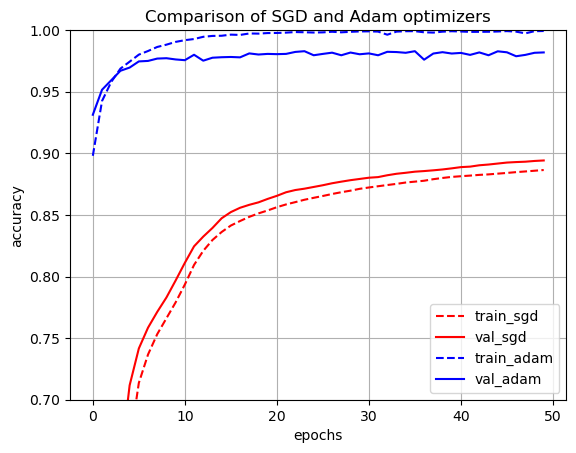

In [7]:
# 그래프 그리기
plt.plot(hist_sgd.history["accuracy"],"r--")
plt.plot(hist_sgd.history["val_accuracy"], "r")
plt.plot(hist_adam.history["accuracy"],"b--")
plt.plot(hist_adam.history["val_accuracy"], "b")
plt.title("Comparison of SGD and Adam optimizers")
plt.ylim((0.7, 1.0))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train_sgd", "val_sgd", "train_adam", "val_adam"])
plt.grid()
plt.show()